# Required
The required libraries/packages for this assignment is `pandas` , `numpy`, `matplotlib` and `seaborn`.
- `pip install pandas`
- `pip install numpy`
- `pip instal matplotlib`
- `pip install seaborn`


## Read in the "Slugs and Snails" dataset
Read the required data from the CSV file and inspect it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading the dataset
df = pd.read_csv("/content/Slugs+and+Snails.csv")

In [2]:
#Inspect the first 5 rows of the dataset
df.head()

,Project.Name,UNIT,SEARCH.AREA,Time,Date,EASTING,NORTHING,MolluskCode,ScientificName,Type,CommonName,Count
0,Nehalem,31-1,SA1,2011-10-28 15:00:00,2011-10-28,492073.0,5080757.0,VECO,Vespericola columbianus,Snail,Northwest Hesperian snail,2
1,Nehalem,31-1,SA10,2011-10-28 16:45:00,2011-10-28,492064.0,5080488.0,ARCO,Ariolimax columbiana,Slug,Banana slug,1
2,Nehalem,31-1,SA10,2011-10-28 16:45:00,2011-10-28,492064.0,5080488.0,VECO,Vespericola columbianus,Snail,Northwest Hesperian snail,2
3,Nehalem,31-1,SA12,2011-10-27 17:45:00,2011-10-27,492186.0,5080244.0,ANSP,Ancotrema sportella,Snail,Beaded lancetooth snail,1
4,Nehalem,31-1,SA13,2011-10-28 08:00:00,2011-10-28,492265.0,508029.0,HAVA,Haplotrema vancouverense,Snail,Robust lancetooth snail,3


In [3]:
#Inspect the last 5 rows of the dataset
df.tail()

,Project.Name,UNIT,SEARCH.AREA,Time,Date,EASTING,NORTHING,MolluskCode,ScientificName,Type,CommonName,Count
3582,Walker Creek,29-2,29-2SA7-2,2012-06-11 12:00:00,2012-06-11,465071.0,5014360.0,PRLA,Pristiloma lansingi,Snail,Denticulate tightcoil snail,1
3583,Walker Creek,29-2,29-2SA7-2,2012-06-11 12:00:00,2012-06-11,465071.0,5014360.0,VECO,Vespericola columbianus,Snail,Northwest Hesperian snail,1
3584,Walker Creek,29-2,29-2SA8,2011-11-25 10:00:00,2011-11-25,464774.0,5014543.0,HAVA,Haplotrema vancouverense,Snail,Robust lancetooth snail,1
3585,Walker Creek,29-2,29-2SA9,2011-11-16 07:45:00,2011-11-16,464576.0,5014302.0,HAVA,Haplotrema vancouverense,Snail,Robust lancetooth snail,1
3586,Walker Creek,29-2,29-2SA9-2,2012-06-11 13:10:00,2012-06-11,464925.0,5014504.0,PRLA,Pristiloma lansingi,Snail,Denticulate tightcoil snail,1


## Filtering the dataset and Data cleaning for the filtered dataset
- Subset the data by columns to choose only those columns which will help in answering the dataset associated questions.

In [4]:
filtered_df=df.filter(items=['Date','ScientificName','Type','Count'])
filtered_df.head()

,Date,ScientificName,Type,Count
0,2011-10-28,Vespericola columbianus,Snail,2
1,2011-10-28,Ariolimax columbiana,Slug,1
2,2011-10-28,Vespericola columbianus,Snail,2
3,2011-10-27,Ancotrema sportella,Snail,1
4,2011-10-28,Haplotrema vancouverense,Snail,3


## Data Preprocessing: Cleaning and Manipulation
- Understand the total number of rows and columns of the dataset along with the datatypes of each column. Additionally, figure out how many missing values are present so that I can handle them in the filtered dataset.
- Perform data cleaning by changing the datatype of "Date" from "Object" to "DateTime".
- Adding a new column "Year" by extracting the "year" value and another column "Month" by extracting "month" from "Date".
- Adding the "Season" column based on the month of the year.
- Drop the "Date" column as it does not contribute for further analysis.


In [5]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3587 entries, 0 to 3586
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            3587 non-null   object
 1   ScientificName  3587 non-null   object
 2   Type            3587 non-null   object
 3   Count           3587 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 112.2+ KB


In [6]:
missing_values_per_column=filtered_df.isnull().sum()
missing_values_per_column

Date              0
ScientificName    0
Type              0
Count             0
dtype: int64

There are no missing values in the dataset.

In [7]:
filtered_df['Date']=pd.to_datetime(filtered_df['Date'])

In [8]:
filtered_df['Month']= filtered_df['Date'].dt.month_name()
filtered_df['Year']= filtered_df['Date'].dt.year
filtered_df.head()

,Date,ScientificName,Type,Count,Month,Year
0,2011-10-28,Vespericola columbianus,Snail,2,October,2011
1,2011-10-28,Ariolimax columbiana,Slug,1,October,2011
2,2011-10-28,Vespericola columbianus,Snail,2,October,2011
3,2011-10-27,Ancotrema sportella,Snail,1,October,2011
4,2011-10-28,Haplotrema vancouverense,Snail,3,October,2011


In [9]:
filtered_df.tail()

,Date,ScientificName,Type,Count,Month,Year
3582,2012-06-11,Pristiloma lansingi,Snail,1,June,2012
3583,2012-06-11,Vespericola columbianus,Snail,1,June,2012
3584,2011-11-25,Haplotrema vancouverense,Snail,1,November,2011
3585,2011-11-16,Haplotrema vancouverense,Snail,1,November,2011
3586,2012-06-11,Pristiloma lansingi,Snail,1,June,2012


In [10]:
#Adding season column
# Define the mapping of months to seasons
seasons = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring',
    'May': 'Spring', 'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}

# Map each month to its respective season
filtered_df['Season'] = filtered_df['Month'].map(seasons)
filtered_df.head()

,Date,ScientificName,Type,Count,Month,Year,Season
0,2011-10-28,Vespericola columbianus,Snail,2,October,2011,Fall
1,2011-10-28,Ariolimax columbiana,Slug,1,October,2011,Fall
2,2011-10-28,Vespericola columbianus,Snail,2,October,2011,Fall
3,2011-10-27,Ancotrema sportella,Snail,1,October,2011,Fall
4,2011-10-28,Haplotrema vancouverense,Snail,3,October,2011,Fall


In [11]:
filtered_df.tail()

,Date,ScientificName,Type,Count,Month,Year,Season
3582,2012-06-11,Pristiloma lansingi,Snail,1,June,2012,Summer
3583,2012-06-11,Vespericola columbianus,Snail,1,June,2012,Summer
3584,2011-11-25,Haplotrema vancouverense,Snail,1,November,2011,Fall
3585,2011-11-16,Haplotrema vancouverense,Snail,1,November,2011,Fall
3586,2012-06-11,Pristiloma lansingi,Snail,1,June,2012,Summer


In [12]:
# Drop 'Date' column
filtered_df.drop(columns=['Date'], inplace=True)
filtered_df

,ScientificName,Type,Count,Month,Year,Season
0,Vespericola columbianus,Snail,2,October,2011,Fall
1,Ariolimax columbiana,Slug,1,October,2011,Fall
2,Vespericola columbianus,Snail,2,October,2011,Fall
3,Ancotrema sportella,Snail,1,October,2011,Fall
4,Haplotrema vancouverense,Snail,3,October,2011,Fall
...,...,...,...,...,...,...
3582,Pristiloma lansingi,Snail,1,June,2012,Summer
3583,Vespericola columbianus,Snail,1,June,2012,Summer
3584,Haplotrema vancouverense,Snail,1,November,2011,Fall
3585,Haplotrema vancouverense,Snail,1,November,2011,Fall


## Data Manipulation: Grouping and Aggregating
Let's answer the the questions:

## Question 1:
How do the number of slugs and snails found by biologists change over time in this data set?

In [13]:
#Creating a dataframe that contains only slugs and snails found by the biologists.
slugs_snail_df = filtered_df[(filtered_df['Type']=='Slug') | (filtered_df['Type']=='Snail')]
number_slugs_snail = slugs_snail_df.groupby(['Year', 'Month','Type'])['Count'].sum().reset_index(name='Total')
number_slugs_snail

,Year,Month,Type,Total
0,2006,June,Slug,120
1,2006,June,Snail,637
2,2006,May,Slug,231
3,2006,May,Snail,1065
4,2006,November,Slug,46
5,2006,November,Snail,2468
6,2011,December,Slug,10
7,2011,December,Snail,52
8,2011,June,Slug,196
9,2011,June,Snail,794


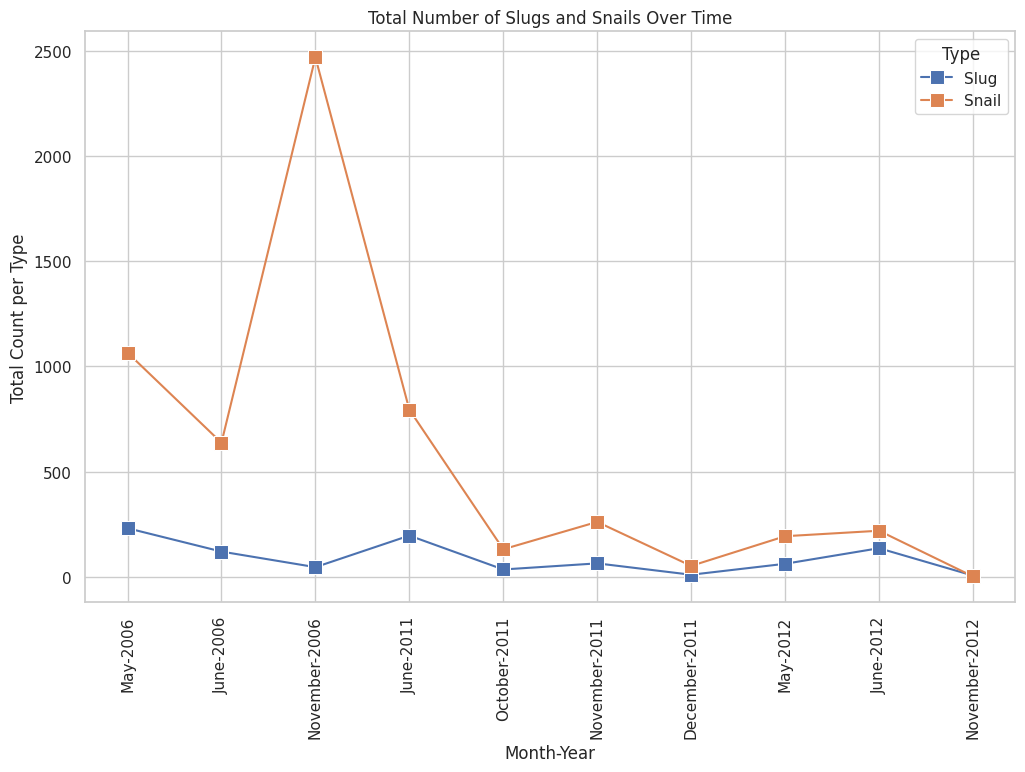

In [14]:
#Pretty Plot
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Define the correct order of months for number_slugs_snail
number_slugs_snail['Month'] = pd.Categorical(number_slugs_snail['Month'], categories=months_order, ordered=True)

# Sort by year and then by month
number_slugs_snail = number_slugs_snail.sort_values(by=['Year', 'Month'])

# Create a new column for plotting purposes
number_slugs_snail['Month-Year'] = number_slugs_snail['Month'].astype(str) + '-' + number_slugs_snail['Year'].astype(str)

# Create the line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12*0.618))
sns.lineplot(data=number_slugs_snail, x='Month-Year', y='Total', hue='Type', marker='s',markersize=10)

# Customize the plot
plt.title('Total Number of Slugs and Snails Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Count per Type')
plt.legend(title='Type')
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.show()

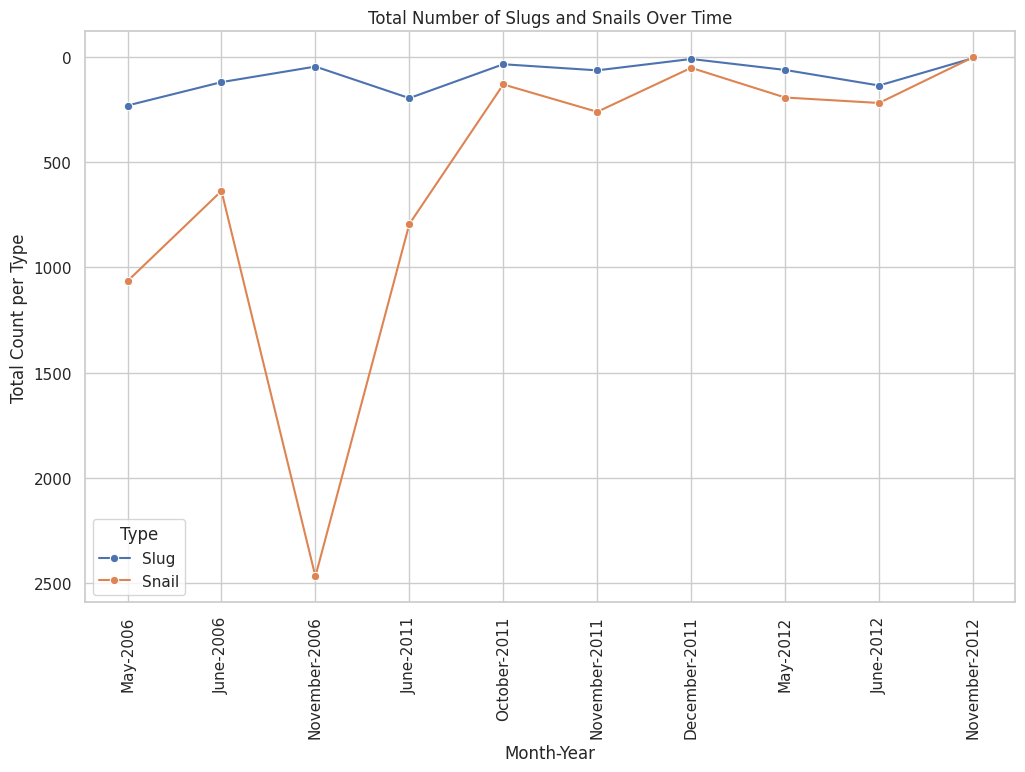

In [15]:
#Illusion plot
# Create the line plot with a distorted y-axis
plt.figure(figsize=(12, 12*0.618))
sns.lineplot(data=number_slugs_snail, x='Month-Year', y='Total', hue='Type', marker='o')

# Add distortion to y-axis
plt.gca().invert_yaxis()

# Customize the plot
plt.title('Total Number of Slugs and Snails Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Count per Type')
plt.legend(title='Type')
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.show()

## Question 2:
How do the number of slug and snail species found by biologists change over time in this
data set?

In [16]:
different_species_slugs_snail = slugs_snail_df.groupby(['Year', 'Month', 'Type'])['ScientificName'].nunique().reset_index(name='TotalSpecies')
different_species_slugs_snail

,Year,Month,Type,TotalSpecies
0,2006,June,Slug,3
1,2006,June,Snail,13
2,2006,May,Slug,5
3,2006,May,Snail,13
4,2006,November,Slug,7
5,2006,November,Snail,17
6,2011,December,Slug,5
7,2011,December,Snail,8
8,2011,June,Slug,9
9,2011,June,Snail,11


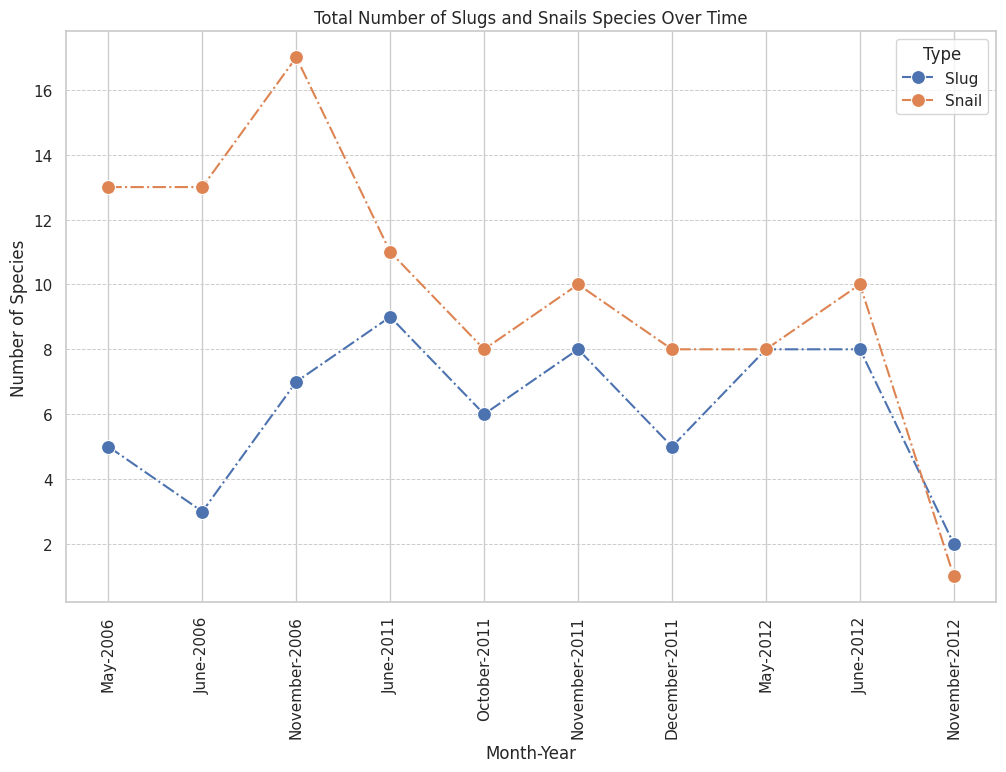

In [17]:
different_species_slugs_snail['Month'] = pd.Categorical(different_species_slugs_snail['Month'], categories=months_order, ordered=True)
# Sort by year and then by month
different_species_slugs_snail = different_species_slugs_snail.sort_values(by=['Year', 'Month'])

# Create a new column for plotting purposes
different_species_slugs_snail['Month-Year'] = different_species_slugs_snail['Month'].astype(str) + '-' + different_species_slugs_snail['Year'].astype(str)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 12*0.618))
sns.lineplot(data=different_species_slugs_snail, x='Month-Year', y='TotalSpecies', hue='Type', marker='o',markersize=10,linestyle='-.')

# Customize the plot
plt.title('Total Number of Slugs and Snails Species Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Species')
plt.legend(title='Type')
plt.xticks(rotation=90)

# Enable grid for the plot
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.show()

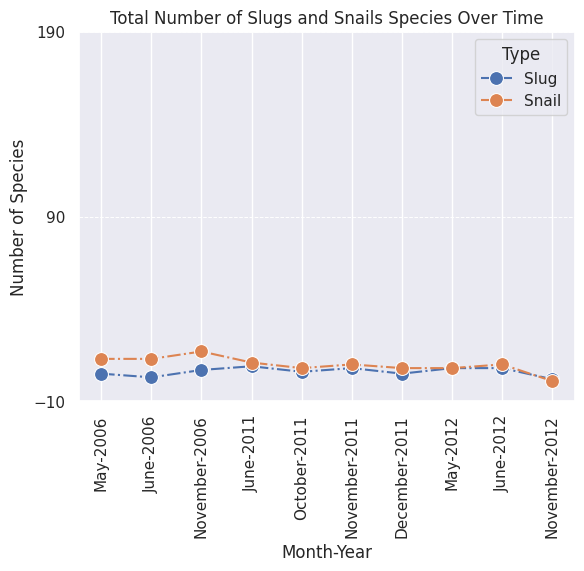

In [18]:
#Illusion plot
# Create the line plot
sns.set(style="darkgrid")
sns.lineplot(data=different_species_slugs_snail, x='Month-Year', y='TotalSpecies', hue='Type', marker='o',markersize=10,linestyle='-.')

# Customize the plot
plt.title('Total Number of Slugs and Snails Species Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Species')
plt.legend(title='Type')
plt.xticks(rotation=90)

# Enable grid for the plot
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
# Set y-axis scaling from -10 to 200 with a gap of 100 each
plt.yticks(np.arange(-10, 200, 100))
# Show the plot
plt.show()


### Pretty plots answering both the questions.

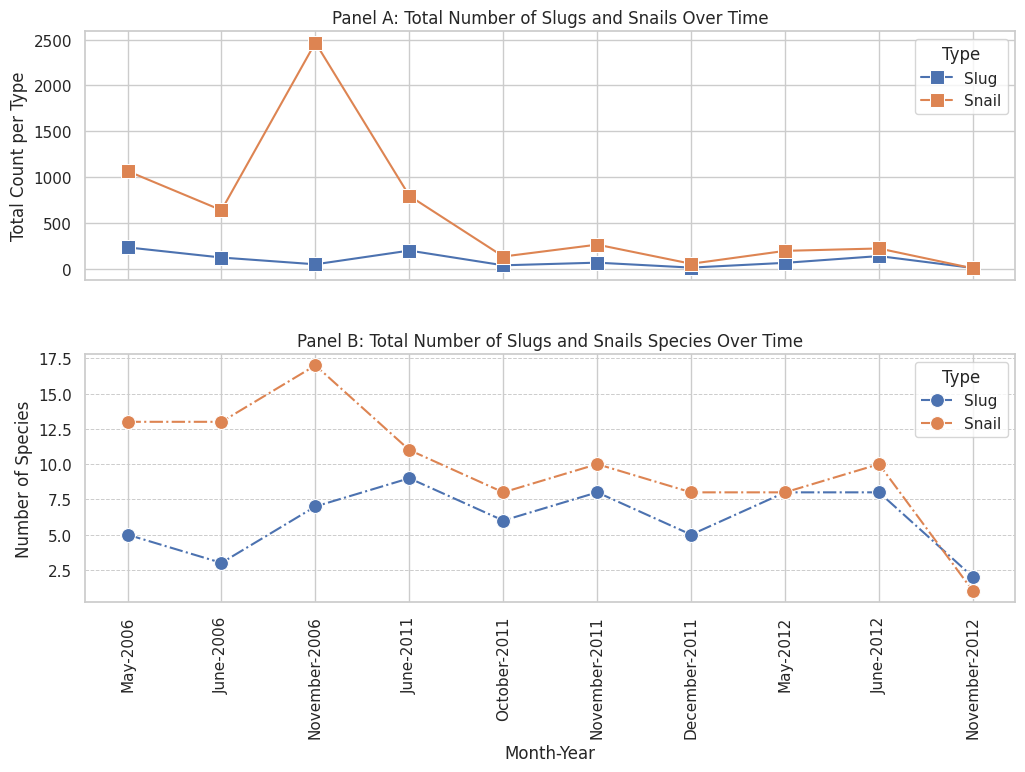

In [19]:
# Pretty Plot
sns.set(style="whitegrid")

# Create subplots with division bars
fig, axs = plt.subplots(2, 1, figsize=(12, 12*0.618), sharex=True, gridspec_kw={'hspace': 0.3}, frameon=True)

# First subplot
sns.lineplot(ax=axs[0], data=number_slugs_snail, x='Month-Year', y='Total', hue='Type', marker='s', markersize=10)

# Customize the first subplot
axs[0].set_title('Panel A: Total Number of Slugs and Snails Over Time')
axs[0].set_ylabel('Total Count per Type')
axs[0].legend(title='Type')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(True)

# Second subplot
sns.lineplot(ax=axs[1], data=different_species_slugs_snail, x='Month-Year', y='TotalSpecies', hue='Type', marker='o',markersize=10,linestyle='-.')

# Customize the second subplot
axs[1].set_title('Panel B: Total Number of Slugs and Snails Species Over Time')
axs[1].set_xlabel('Month-Year')
axs[1].set_ylabel('Number of Species')
axs[1].legend(title='Type')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(True, axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


**Figure 1.** Two lineplots showing the changes in slug and snail counts between May 2006 and November 2012. Panel A shows the total counts of slugs and snails, with snail counts peaking dramatically in November 2006, while slug counts remain relatively stable. Panel B illustrates the number of slugs and snails species, highlighting the high variability and significant peak for snail species in November 2006, contrasted with consistently lower and more stable slug species counts.

### Top Plot Observations:

- **Snail Count Peaks:** The number of snails found by biologists exhibits a dramatic peak in November 2006, reaching a count of approximately 2500.
- **Relative Stability in Slug Counts:** In contrast, the number of slugs remains relatively stable over time, with no significant peaks. The counts fluctuate slightly but generally stay below 200.
- **Drastic Decline in Snail Counts Post-2006:** After the peak in November 2006, the number of snails found collapsed significantly and stabilizes at lower counts similar to those of slugs.
- **Consistency in Low Counts:** Both slugs and snails show consistently low counts in several time periods, particularly from October-2011.

### Bottom Plot Observations:

- **Species Count Peaks:** Similar to the top plot, the counts for snail species peak significantly around November 2006, reaching 17 different snail species.
- **Comparative observations:**
  - The total number of species observed tends to decrease towards the end of the observed period.
  - The decline is more abrupt for snails, whereas slugs show a more gradual decrease.
  - Snail species are generally more numerous than slug species, especially in the earlier years.
  - Both slug and snail species show a noticeable decline after June 2011.
  - There is a converging trend observed in November 2012 where both slug and snail species numbers are at their lowest.

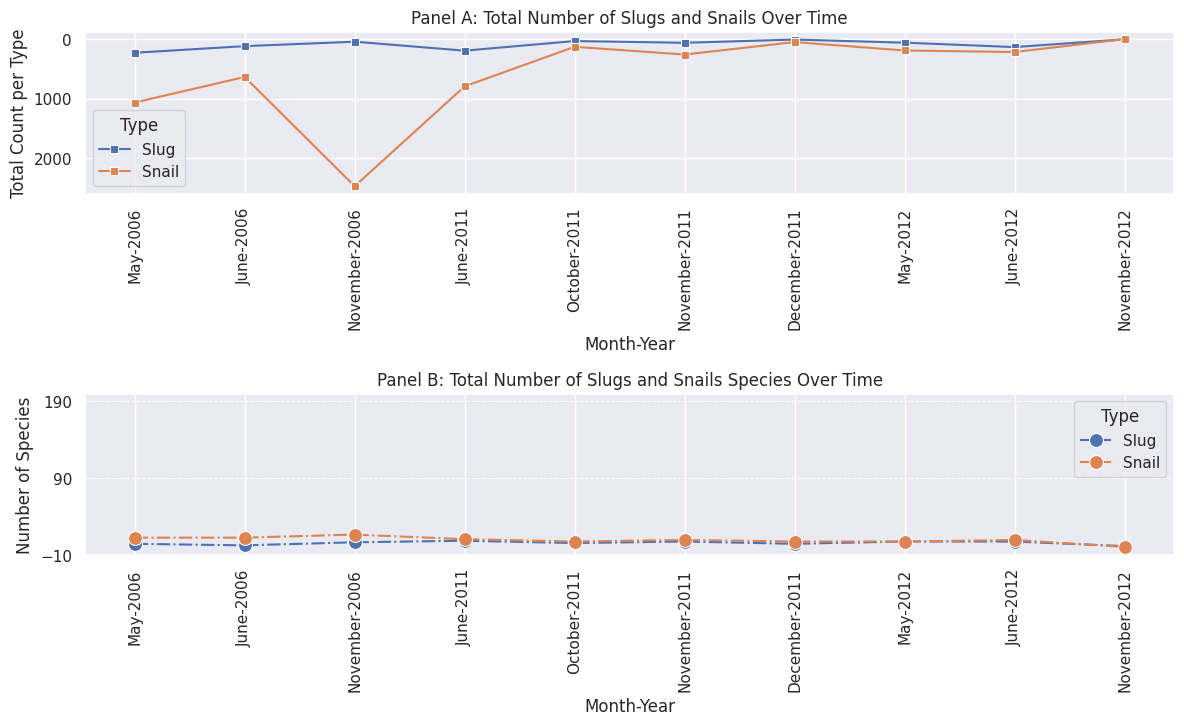

In [20]:
# Illusion Plot
sns.set(style="darkgrid")

# Create subplots with division bars
fig, axs = plt.subplots(2, 1, figsize=(12, 12*0.618))

# First subplot
sns.lineplot(ax=axs[0], data=number_slugs_snail, x='Month-Year', y='Total', hue='Type', marker='s')
# Add distortion to y-axis
axs[0].invert_yaxis()
# Customize the first subplot
axs[0].set_title('Panel A: Total Number of Slugs and Snails Over Time')
axs[0].set_ylabel('Total Count per Type')
axs[0].legend(title='Type')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(True)

# Second subplot
sns.lineplot(ax=axs[1], data=different_species_slugs_snail, x='Month-Year', y='TotalSpecies', hue='Type', marker='o',markersize=10,linestyle='-.')

# Customize the second subplot
axs[1].set_title('Panel B: Total Number of Slugs and Snails Species Over Time')
axs[1].set_xlabel('Month-Year')
axs[1].set_ylabel('Number of Species')
axs[1].legend(title='Type')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(True, axis='y', linestyle='--', linewidth=0.7)

# Set y-axis scaling from -10 to 200 with a gap of 100 each for the second subplot
axs[1].set_ylim(-10, 200)
axs[1].set_yticks(np.arange(-10, 200, 100))

plt.tight_layout()
plt.show()

**Figure 2.** Two lineplots showing the changes in slug and snail counts between May 2006 and November 2012.Panel A shows the total counts of slugs and snails, where snail counts vary more significantly, particularly with a noticeable dip in November 2006.Panel B illustrates an overall similar number of slugs and snails species.Despite the seemingly different trends in total counts by type(Panel A) and number of species per type(Panel B), there is an illusion caused by the data representations(inverted y-axis in Panel A) and different scales(Panel B).

## Illusions and potential issues with the plot.

- **Inverted Y-Axis Scale:** In Panel A, the y-axis does not start at zero as it is inverted, which can give a misleading impression of the magnitude of changes over time between Slug and Snail counts. This makes it difficult to interpret the true counts and trends accurately.

- **Overlapping Lines:** In Panel B, the overlapping lines for Slug and Snail make it hard to differentiate between the two types and their trends. This scaling issue can obscure any real differences or patterns in the data.

- **Negative Values in Count Data:** In Panel B , y-axis has negative values which is not logical for count data (as counts cannot be negative). This might suggest an issue with data processing or plotting.

To improve the plots, consider:
- Ensuring the y-axis starts at zero to provide a clearer comparison.
- Avoiding negative values on the y-axis for count data.
- Use appropriate scaling to get informative trend for each species of the snail and slug type.